# Gradient Boosting Machine(GBM)

## GBM 회귀모델
- GBM은 𝑚라운드의 베이스 모델 $ℎ_𝑚$ 이 $(m-1)$라운드까지의 베이스 모델을 결합한 $𝐻𝑚−1=ℎ_1+⋯+ℎ_{𝑚−1}$의 예측 오류를 학습하는 알고리즘
- 즉, 이전 결합 모델 $H_{m-1}$의 예측 오류는 예측 불가능한 랜덤 노이즈가 아닌 아직까지 학습 못한 특징이라고 가정함
- 베이스모델로는 의사결정나무 알고리즘인 **CART**를 주로 사용
- $h_0$는 초기값으로 일반적으로 회귀문제에서 출력변수의 평균을 사용함. 실질적으로 $h_1$ 부터 베이스 모델을 학습시킴

![](img\gbm회귀.png)

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 1. 데이터 로드 및 전처리

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
data = df = pd.read_csv(URL+"data/Fault_data.csv",encoding="EUC-KR")

In [ ]:
data.drop(["자재구분","END_DATE_TIME"],axis=1,inplace=True)
data.dropna(axis=1,inplace=True)

#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.STDDEV0,CROT.MEAN0,CROT.RANGE0,...,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.STDDEV9,CROT.MEAN9,CROT.RANGE9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,4,0.044554,38.083127,0.254154,0.124753,0.044329,0.439883,0,35,0,...,17.350926,0.032832,35.011650,0.127077,0,35,0,0.405343,45.124841,3.079182
1,2,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,0,27,0,...,1.466280,0.020858,35.550245,0.063540,0,27,0,1.923012,45.350277,15.004887
2,3,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,0,15,0,...,13.098728,0.021635,36.013373,0.063538,0,15,0,0.161640,45.071393,0.977516


### 2. 평가 지표 함수

In [ ]:
# 평가 지표 출력 함수
def print_all_reg(Y_test,pred):
    print("model의 MSE 값은 {:.3f}".format(mean_squared_error(Y_test,pred)))
    print("model의 MAE 값은 {:.3f}".format(mean_absolute_error(Y_test, pred)))
    print("model의 MAPE 값은 {:.3f}".format(mean_absolute_percentage_error(Y_test, pred)))
    print("model의 r2 값은 {:.3f}".format(r2_score(Y_test, pred)))

### 3. 모델 학습 및 예측

In [ ]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5,shuffle =True)

[[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)]  
**sklearn.model_selection.train_test_split**
- **test_size** : float or int, default = 0.25, 정수값일시 test사이즈로 설정하고 싶은 샘플 수 입력
- **train_size** : float or int, default = None
- **random_state** : int, default = None, 랜덤 seed값 설정, 같은 seed 내에선 동일결과 추출
- **shuffle** : bool, default = True, 데이터셋 무작위 추출, 시계열 데이터와 같이 순차적 추출이 필요한 경우엔 Shuffle = False!
- **stratify** : array-like, default = None, True일시 계층적 샘플링 진행 ([참고](https://www.investopedia.com/terms/stratified_random_sampling.asp))

[[GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)]         
**주요 하이퍼파라미터**
- **loss** : {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’, 경사하강법을 활용한 예측오류 학습과정에서 사용할 손실함수
- **learning_rate** : float, default=0.1, 학습률 설정
    - 너무 작을시 : 예측성능은 높아질 수 있으나, 학습시간이 오래걸리고 local minima 문제가 발생 할 수 있음. 베이스 모델의 영향력이 과도하게 수축되어 과소적합
    - 너무 클 시 : 학습속도가 빠르지만 global mimimum값을 찾지 못할 수 있으며, 베이스 모델 영향력이 과도하게 커져 과적합이 나타남.
- **n_estimators** : int, default=100, 베이스모델의 개수로 많을수록 예측성능은 높아질 수 있으나 학습시간이 오래걸린다.
- **max_depth** : int, default = 3, 각 트리의 최대깊이를 설정. 값이 클수록 모델의 복잡도가 올라간다.
- **min_samples_split** : int or float, default = 2, 자식노드를 분할하는데 필요한 최소 샘플의 수
- **min_samples_leaf** : int or float, default = 1, leaf node에서 필요한 최소 샘풀수이며, 너무 적을 시 과적합 발생
- **max_leaf_nodes** : int, default=None, 최대 leaf node 수 제한
- **validation_fraction** : float, default=0.1, 훈련데이터 중 설정 비율만큼 검증용 데이터셋으로 활용한다.
- **n_iter_no_change** : int, default=None, validation_fraction에서 설정한 검증데이터셋에서 n_iter_no_change에 지정한 반복 횟수동안 검증점수가 좋아지지 않으면 학습을 조기종료한다.
- **ccp_alpha** : non-negative float, default=0.0

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#ccp_alpha_list = list(np.arange(0.1,1,0.1)) # 0.1부터 0.9까지 0.1 간격으로 출력한 값을 리스트로 반환
learning_rate_list = [0.001,0.002,0.005,0.01,0.02,0.1,0.8]

train_scores =[]
test_scores =[]
for alpha in learning_rate_list: # 사전 정의한 리스트의 각 값마다 모델을 학습하여 최적값 도출
    print(alpha)
    clf = GradientBoostingRegressor(random_state=5,n_estimators = 500,learning_rate = alpha
                                    #,min_samples_leaf = 2,min_samples_split = 2
                                    ,validation_fraction = 0.2, n_iter_no_change = 20,
                                    # ccp_alpha = 50
                                   ) # ccp_alpha 값보다 작으면서 비용복잡도가 가장 큰 Subtree로 GBM모델 학습

    clf.fit(X_train,Y_train) # 정의한 GBM 모델로 훈련데이터 학습

    preds_train = clf.predict(X_train) # 훈련데이터로 학습한 모델로 y값 예측
    preds = clf.predict(X_test) # 실제 테스트 데이터로 y값 예측

    train_scores.append(mean_absolute_error(Y_train,preds_train)) # 훈련 성능 평가
    test_scores.append(mean_absolute_error(Y_test,preds)) # 테스트 성능 평가

    print_all_reg(preds_train,Y_train) # 평가지표 출력
    print("")
    print_all_reg(preds,Y_test)

0.001
model의 MSE 값은 2289.656
model의 MAE 값은 36.841
model의 MAPE 값은 0.478
model의 r2 값은 -3.367

model의 MSE 값은 1177.634
model의 MAE 값은 29.292
model의 MAPE 값은 0.423
model의 r2 값은 -1.407
0.002
model의 MSE 값은 1351.341
model의 MAE 값은 27.807
model의 MAPE 값은 0.384
model의 r2 값은 -0.030

model의 MSE 값은 1018.347
model의 MAE 값은 26.012
model의 MAPE 값은 0.390
model의 r2 값은 0.107
0.005
model의 MSE 값은 1014.330
model의 MAE 값은 23.230
model의 MAPE 값은 0.339
model의 r2 값은 0.468

model의 MSE 값은 1074.681
model의 MAE 값은 25.611
model의 MAPE 값은 0.384
model의 r2 값은 0.320
0.01
model의 MSE 값은 1064.794
model의 MAE 값은 24.061
model의 MAPE 값은 0.347
model의 r2 값은 0.398

model의 MSE 값은 1068.333
model의 MAE 값은 25.495
model의 MAPE 값은 0.381
model의 r2 값은 0.312
0.02
model의 MSE 값은 613.478
model의 MAE 값은 15.467
model의 MAPE 값은 0.252
model의 r2 값은 0.796

model의 MSE 값은 1221.570
model의 MAE 값은 25.670
model의 MAPE 값은 0.394
model의 r2 값은 0.478
0.1
model의 MSE 값은 453.408
model의 MAE 값은 8.729
model의 MAPE 값은 0.139
model의 r2 값은 0.883

model의 MSE 값은 1650.914
model의 MAE 값은 2

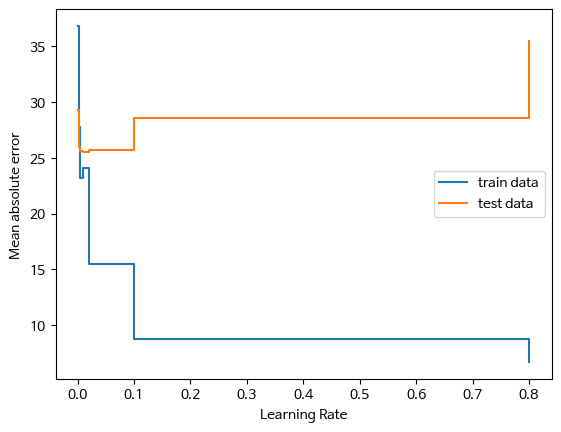

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Mean absolute error")

#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(learning_rate_list, train_scores,  label="train data", drawstyle="steps-post")
ax.plot(learning_rate_list, test_scores,  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
#ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
#plt.xlim(0.7)
plt.show()
plt.close('all')

In [ ]:
# 가장 좋은 성능을 보인 모델의 인덱스를 찾기
best_model_index = np.argmax(test_scores)
best_learning_rate = learning_rate_list[best_model_index]

# 가장 좋은 성능을 보인 모델의 하이퍼 파라미터를 사용하여 모델 재학습
best_reg = GradientBoostingRegressor(random_state=12, n_estimators=500,
                                      learning_rate=best_learning_rate,
                                      validation_fraction=0.2,
                                      n_iter_no_change=20,
                                      # ccp_alpha=0.013
                                     )

best_reg.fit(X_train, Y_train)


GradientBoostingRegressor(learning_rate=0.8, n_estimators=500,
                          n_iter_no_change=20, random_state=12,
                          validation_fraction=0.2)

### Mean Decrease in Impurity

<ipython-input-34-bf869fd36013>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp_top20['Mean Decrease in Imputity'], y=imp_top20["Feature"], palette=palette)


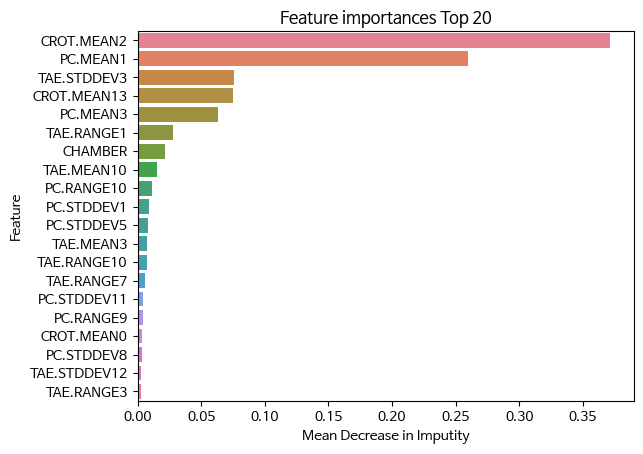

In [ ]:
# 변수 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

var_imp = pd.DataFrame({'Feature': X.columns, 'Mean Decrease in Imputity': best_reg.feature_importances_})
imp_top20 = var_imp.sort_values(by=['Mean Decrease in Imputity'], ascending=False)[:20]

palette = sns.color_palette("husl", len(imp_top20))

plt.figure()
plt.title("Feature importances Top 20")
sns.barplot(x=imp_top20['Mean Decrease in Imputity'], y=imp_top20["Feature"], palette=palette)
plt.show()

### Mean Decrease in Accuracy(Permutation Importance)

In [ ]:
#permutation importance로 변수중요도 추출
from sklearn.inspection import permutation_importance

# # 가장 좋은 성능을 보인 모델의 인덱스를 찾기
# best_model_index = np.argmax(test_scores)
# best_learning_rate = ccp_alpha_list[best_model_index]

# # 가장 좋은 성능을 보인 모델의 하이퍼 파라미터를 사용하여 모델 재학습
# best_reg = GradientBoostingRegressor(random_state=12, n_estimators=500,
#                                       learning_rate=best_learning_rate,
#                                       validation_fraction=0.2,
#                                       n_iter_no_change=10,
#                                       ccp_alpha=0.013)

# best_reg.fit(X_train, Y_train)

# 변수 중요도 확인 (Permutation Importance)
result = permutation_importance(best_reg, X_test, Y_test, n_repeats=10, random_state=12)
sorted_idx = result.importances_mean.argsort()

<ipython-input-36-dc386383b92f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.importances_mean[sorted_idx[::-1]][:20], y=X.columns[sorted_idx[::-1]][:20], palette=palette)


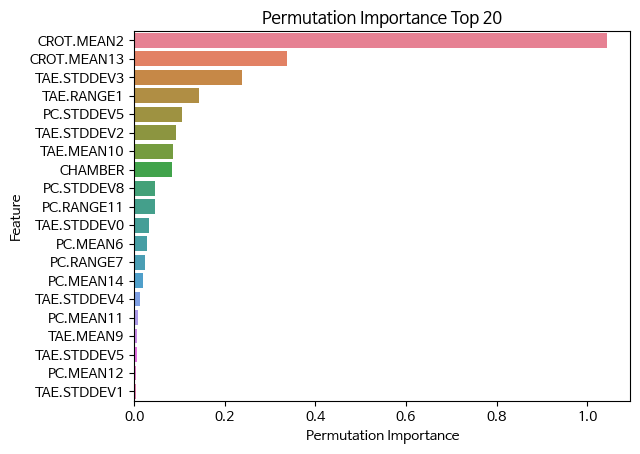

In [ ]:
palette = sns.color_palette("husl", len(imp_top20))
sns.barplot(x=result.importances_mean[sorted_idx[::-1]][:20], y=X.columns[sorted_idx[::-1]][:20], palette=palette)
plt.title("Permutation Importance Top 20")
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.show()

# 변수중요도 작동 원리 확인

In [ ]:
from sklearn.preprocessing import LabelEncoder
from matplotlib import font_manager, rc
import platform
# 운영체제에 따른 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 사용 가능한 폰트 목록 확인
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

# matplotlib의 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지



data= {
    '설비': ['A','B','A','B','B'],
    '온도': [18,20,22,19,17],
    '재료': ['C','D','C','D','C'],
    '제품 두께': [15,9, 14, 8, 9 ]
}
data = pd.DataFrame(data)

label_encoder = LabelEncoder()
data['설비'] = label_encoder.fit_transform(data['설비'])
data['재료'] = label_encoder.fit_transform(data['재료'])

X = data.drop(['제품 두께'], axis=1)
y = data['제품 두께']


NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [ ]:
X

,설비,온도,재료
0,0,18,0
1,1,20,1
2,0,22,0
3,1,19,1
4,1,17,0


  Feature  Importance
0      설비    0.983936
1      온도    0.016064
2      재료    0.000000


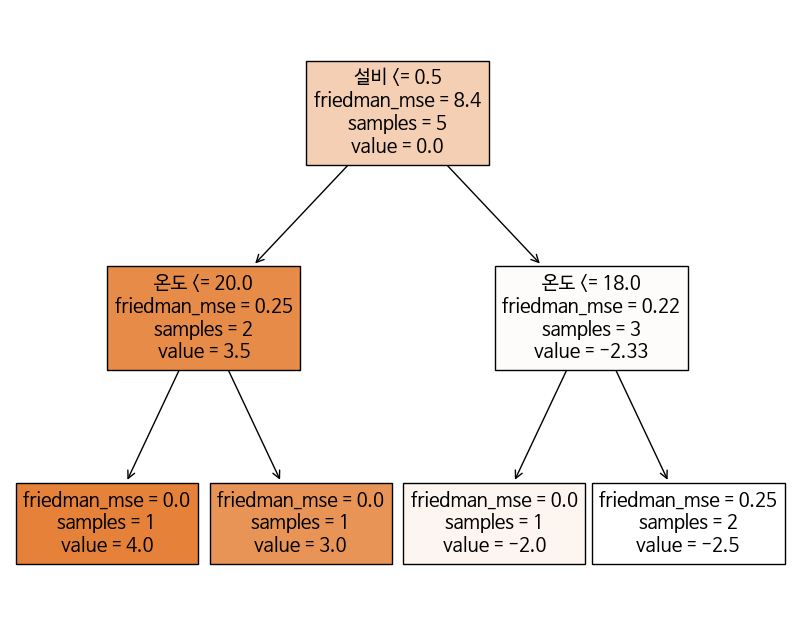

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import tree

# GBM 모델 생성 및 학습
gbm = GradientBoostingRegressor(max_depth=2, max_leaf_nodes= 4, n_estimators=1)
gbm.fit(X, y)

# 변수 중요도 출력
feature_importance = gbm.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)
# 첫 번째 트리 가져오기
sub_tree_0 = gbm.estimators_[0, 0]

# 트리 시각화
plt.figure(figsize=(10, 8))
tree.plot_tree(sub_tree_0, feature_names=X.columns.tolist(), filled=True, proportion=False, precision=2)
plt.show()

In [ ]:
# 노드별 정보 이득 계산 함수
def compute_information_gain(tree, node_id=0):
    if tree.children_left[node_id] == tree.children_right[node_id]:  # 리프 노드
        return 0
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]
    total_samples = tree.n_node_samples[node_id]
    weight_left = tree.n_node_samples[left_child] / total_samples
    weight_right = tree.n_node_samples[right_child] / total_samples
    impurity = tree.impurity[node_id]
    impurity_left = tree.impurity[left_child]
    impurity_right = tree.impurity[right_child]
    info_gain = impurity - (weight_left * impurity_left + weight_right * impurity_right)
    return info_gain

# 각 노드별 정보 이득 계산
node_ids = range(sub_tree_0.tree_.node_count)
info_gains = [compute_information_gain(sub_tree_0.tree_, node_id) for node_id in node_ids]

# 정보 이득 출력
for node_id, info_gain in zip(node_ids, info_gains):
    print(f"Node {node_id}: Information Gain = {info_gain:.4f}")

Node 0: Information Gain = 8.1667
Node 1: Information Gain = 0.2500
Node 2: Information Gain = 0.0556
Node 3: Information Gain = 0.0000
Node 4: Information Gain = 0.0000
Node 5: Information Gain = 0.0000
Node 6: Information Gain = 0.0000


In [ ]:
print('변수중요도_재료: ',(5/5*8.1667)/(5/5*8.1667+2/5*0.2500+3/5*0.0556) )
print('변수중요도_온도: ',(2/5*0.2500+3/5*0.0556)/(5/5*8.1667+2/5*0.2500+3/5*0.0556) )
print('변수중요도_설비: ',(0)/(5/5*8.1667+2/5*0.2500+3/5*0.0556) )

변수중요도_재료:  0.983932646270027
변수중요도_온도:  0.016067353729973036
변수중요도_설비:  0.0
